[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/alesaccoia/IULM_DDM2324_Notebooks/blob/main/06_calcolo_bdi_cdi.ipynb)

# Esercizio calcolo BDI/CDI (sezione 3.2.2 del libro)

Si comincia importando il dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('https://github.com/alesaccoia/IULM_DDM2324_Notebooks/raw/main/data/calcolo_bdi_cdi.xlsx')
print(df)

      Customer #id          Segmento         Brand
0                0             Other  OceanDelight
1                1             Other        SeaYum
2                2             Other           NaN
3                3             Other  OceanDelight
4                4  Health-Conscious           NaN
...            ...               ...           ...
4995          4995             Other           NaN
4996          4996       Adventurous           NaN
4997          4997             Other           NaN
4998          4998             Other  OceanDelight
4999          4999             Other      BlueFish

[5000 rows x 3 columns]


Vediamo per prima cosa la dimensione del dataset

In [8]:
totale_campione = len(df)
totale_campione

5000

Stampiamo a schermo i brand unici all'interno del dataset

In [9]:
target_brands = df['Brand'].unique()
target_brands

array(['OceanDelight', 'SeaYum', nan, 'TunaKing', 'BlueFish'],
      dtype=object)

Ripuliamo la lista dal brand "nan", valore che indica che il consumatore non acquista nessun brand.

Utilizza il caratteristico costrutto chiamato [list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [10]:
target_brands = [b for b in target_brands if b is not np.nan]
target_brands

['OceanDelight', 'SeaYum', 'TunaKing', 'BlueFish']

Calcoliamo il totale di rispondenti che acquista un brand della categoria merceologica, di qualsiasi brand

In [11]:
totale_consumatori_categoria = len(df[df['Brand'].notnull()])
totale_consumatori_categoria

3438

La penetrazione della categoria sulla popolazione é il rapporto tra il numero di consumatori che consuma e il totale di consumatori nel campione

In [12]:
penetrazione_categoria = totale_consumatori_categoria / totale_campione
penetrazione_categoria

0.6876

Possiamo calcolare le proporzioni di persone del campione che acquistano ogni brand nell'analisi nel seguente modo

In [13]:
penetrazione_brand = df['Brand'].value_counts()
penetrazione_brand / totale_campione

Brand
SeaYum          0.2392
TunaKing        0.1714
OceanDelight    0.1510
BlueFish        0.1260
Name: count, dtype: float64

## Calcolo del CDI

Il CDI é calcolato il tasso di penetrazione della categoria merceologica su ognuna delle dimensioni in esame, indicizzato a 100.

Risponde alla domanda "Quante persone appartenenti a ognuno dei segmenti target consumano abitualmente tonno in scatola?"

Vediamo i segmenti unici presenti dentro il nostro dataset

In [14]:

segmenti_target = df['Segmento'].unique().tolist()
segmenti_target

['Other', 'Health-Conscious', 'Adventurous', 'Budget-Friendly']

Vediamo il numero di persone appartenenti a ogni segmento

In [15]:

rispondenti_per_segmento = df['Segmento'].value_counts()
rispondenti_per_segmento

Segmento
Other               3469
Budget-Friendly      644
Adventurous          628
Health-Conscious     259
Name: count, dtype: int64

Vediamoli in un grafico

[]

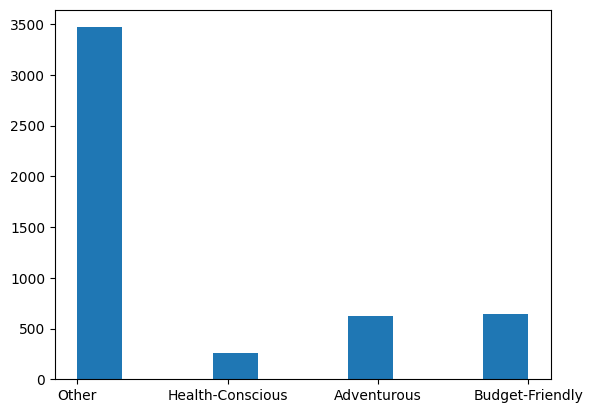

In [16]:
plt.hist(df['Segmento'])
plt.plot()

Ora dediamo il numero di persone appartenenti a ogni segmento __che acquista tonno in scatola__

In [17]:
consumatori_per_segmento = df[df['Brand'].notnull()]['Segmento'].value_counts()
consumatori_per_segmento

Segmento
Other               2390
Adventurous          443
Budget-Friendly      433
Health-Conscious     172
Name: count, dtype: int64

Salviamo in una variabile la diffusione del tonno in scatola in ogni segmento

In [18]:
diffusione_per_segmento = pd.Series()
for seg in segmenti_target:
    diffusione_per_segmento[seg] = consumatori_per_segmento[seg] / rispondenti_per_segmento[seg]

diffusione_per_segmento

Other               0.688959
Health-Conscious    0.664093
Adventurous         0.705414
Budget-Friendly     0.672360
dtype: float64

Per indicizzare un indicatore a 100 si divide ogni numero per la media sulla popolazione (o campione)

In [19]:
cdi = 100.0 * diffusione_per_segmento / penetrazione_categoria
cdi

Other               100.197696
Health-Conscious     96.581248
Adventurous         102.590752
Budget-Friendly      97.783631
dtype: float64

# Calcolo del BDI

Il Brand Development Index indica quanto ogni marca sia diffusa in una determinata dimensione di analisi (un segmento nel nostro caso) rispetto alla penetrazione del brand nell'intera popolazione. Cominciamo salvando la diffusione del brand nella popolazione con la seguente istruzione:

In [20]:
diffusione_brand_popolazione = df['Brand'].value_counts()
diffusione_brand_popolazione = diffusione_brand_popolazione / len(df)
diffusione_brand_popolazione

Brand
SeaYum          0.2392
TunaKing        0.1714
OceanDelight    0.1510
BlueFish        0.1260
Name: count, dtype: float64

il seguente codice itera su tutte le permutazioni di brand/segmento, calcolando il BDI (che é la diffusione di un brand in un determinato segmento, indicizzata sulla diffusione del brand nell'intero campione)

In [21]:
# Create a DataFrame for the results
results_df = pd.DataFrame(columns=['brand', 'segmento', 'consumatori_per_brand_e_segmento', 'consumatori_per_segmento', 'diffusione_brand_nel_segmento', 'diffusione_brand_popolazione', 'BDI', 'CDI'])

rows_list = []

for brand in target_brands:
    for segmento in segmenti_target:
        # qui prendiamo il numero di consumatori del nostro segmento che acquistano regolarmente il brand
        consumatori_per_brand_e_segmento = len(df[(df['Brand'] == brand) & (df['Segmento'] == segmento)])
        # il numero di consumatori totali di questo segmento é giá in "rispondenti_per_segmento", da qui possiamo sapere la diffusione del brand nel segmento
        diffusione_brand_nel_segmento = consumatori_per_brand_e_segmento / rispondenti_per_segmento[segmento]
        # la diffusione del brand nell'intera popolazione é in diffusione_brand_popolazione, quindi possiamo calcolare il bdi

        bdi = 100.0 * diffusione_brand_nel_segmento / diffusione_brand_popolazione[brand]

        row = {
            'brand': brand,
            'segmento': segmento,
            'consumatori_per_brand_e_segmento': consumatori_per_brand_e_segmento,
            'consumatori_per_segmento': consumatori_per_segmento[segmento],
            'diffusione_brand_nel_segmento': diffusione_brand_nel_segmento,
            'diffusione_brand_popolazione': diffusione_brand_popolazione[brand],
            'BDI': bdi,
            'CDI': cdi[segmento],
        }
        rows_list.append(row)

results_df = pd.concat([results_df, pd.DataFrame(rows_list)], ignore_index=True)
results_df

,brand,segmento,consumatori_per_brand_e_segmento,consumatori_per_segmento,diffusione_brand_nel_segmento,diffusione_brand_popolazione,BDI,CDI
0,OceanDelight,Other,543,2390,0.156529,0.1510,103.661761,100.197696
1,OceanDelight,Health-Conscious,35,172,0.135135,0.1510,89.493467,96.581248
2,OceanDelight,Adventurous,87,443,0.138535,0.1510,91.745054,102.590752
3,OceanDelight,Budget-Friendly,90,433,0.139752,0.1510,92.550697,97.783631
4,SeaYum,Other,821,2390,0.236668,0.2392,98.941316,100.197696
5,SeaYum,Health-Conscious,61,172,0.235521,0.2392,98.462055,96.581248
6,SeaYum,Adventurous,150,443,0.238854,0.2392,99.855143,102.590752
7,SeaYum,Budget-Friendly,164,433,0.254658,0.2392,106.462536,97.783631
8,TunaKing,Other,594,2390,0.171231,0.1714,99.901343,100.197696
9,TunaKing,Health-Conscious,40,172,0.154440,0.1714,90.105108,96.581248


In [22]:
results_df['BDI_CDI'] = results_df.BDI / results_df.CDI

Come ultima cosa, per esportare in excel, "pivottiamo" mantenendo sulle righe i segmenti target e sulle colonne i brand

In [23]:
pivoted_df = results_df.pivot_table(index='segmento',
                                   columns='brand',
                                   values=['BDI', 'CDI', 'BDI_CDI'],
                                   aggfunc='first')

pivoted_df

BDI                                        BDI_CDI  \
brand               BlueFish OceanDelight      SeaYum    TunaKing  BlueFish   
segmento                                                                      
Adventurous       116.267314    91.745054   99.855143  105.909371  1.133312   
Budget-Friendly    86.266391    92.550697  106.462536   98.748342  0.882217   
Health-Conscious  110.314396    89.493467   98.462055   90.105108  1.142193   
Other              98.834576   103.661761   98.941316   99.901343  0.986396   

                                                          CDI               \
brand            OceanDelight    SeaYum  TunaKing    BlueFish OceanDelight   
segmento                                                                     
Adventurous          0.894282  0.973335  1.032348  102.590752   102.590752   
Budget-Friendly      0.946485  1.088756  1.009866   97.783631    97.783631   
Health-Conscious     0.926613  1.019474  0.932946   96.581248    96.581248   
Other                1.034572  0.987461  0.997042  100.197696   100.197696   

                                          
brand                 SeaYum    TunaKing  
segmento                                  
Adventurous       102.590752  102.590752  
Budget-Friendly    97.783631   97.783631  
Health-Conscious   96.581248   96.581248  
Other             100.197696  100.197696

In [24]:
pivoted_df.to_excel('pivoted_df.xlsx')